In [2]:
import pandas as pd

In [6]:
vaccine = pd.read_csv("../data/India/vaccination/covid_vaccine.csv")
vaccine.drop(columns = ["Datetime", "Username", "Tweet Id"], inplace = True)
vaccine

,Text
0,India's first mRNA Covid vaccine enters final ...
1,💉 About sixteen million (77%) Sri Lankans have...
2,"Woman’s Autopsy, Obituary Blame Moderna’s Covi..."
3,India’s first mRNA COVID-19 vaccine likely to ...
4,Decision on third dose of COVID-19 vaccine for...
...,...
28923,"So, Vaccine approved?? #CovidVaccine https://t..."
28924,Scientific Reasons behind many Indian Supersti...
28925,Rujuk balik artikel @bernamadotcom. Emas diang...
28926,"Nothing can be 100% sure , not even whether yo..."


In [9]:
vaccination = pd.read_csv("../data/India/vaccination/covid_vaccination.csv")
vaccination.drop(columns = ["Datetime", "Username", "Tweet Id"], inplace = True)
vaccination

,Text
0,@ManiSAiyarINC Soniya mummy hoti toh COVID me ...
1,"#PICKids : About 20,000 children in Perlis eli..."
2,Previous COVID-19 Infection – But NOT Vaccinat...
3,India’s COVID-19 vaccination coverage crosses ...
4,I got a call from office of Principal commissi...
...,...
17422,The UK Government has confirmed that the Pfize...
17423,Breaking news :\nUK approves Pfizer biotech co...
17424,What is covid-19 means?\nIts mean that you req...
17425,Is the govt telling us that vaccination agains...


In [10]:
frames = [vaccination, vaccine]

result = pd.concat(frames)

In [11]:
result

,Text
0,@ManiSAiyarINC Soniya mummy hoti toh COVID me ...
1,"#PICKids : About 20,000 children in Perlis eli..."
2,Previous COVID-19 Infection – But NOT Vaccinat...
3,India’s COVID-19 vaccination coverage crosses ...
4,I got a call from office of Principal commissi...
...,...
28923,"So, Vaccine approved?? #CovidVaccine https://t..."
28924,Scientific Reasons behind many Indian Supersti...
28925,Rujuk balik artikel @bernamadotcom. Emas diang...
28926,"Nothing can be 100% sure , not even whether yo..."


In [12]:
tweet_text_list = result['Text'].tolist()

tweet_text_list

['@ManiSAiyarINC Soniya mummy hoti toh COVID me magic stick ghuma ke death kam kar deti... Aur Rahul baba apne hanto se taiyar karke sabko vaccination deta',
 '#PICKids : About 20,000 children in Perlis eligible for COVID-19 vaccination\n\nhttps://t.co/uf0Q9WvCQr https://t.co/HqPDRbjmLR',
 'Previous COVID-19 Infection – But NOT Vaccination – Improves Performance of Antibodies - https://t.co/RoMfMbDJs3',
 'India’s COVID-19 vaccination coverage crosses 171.73 cr mark\n\nhttps://t.co/QMfmLCoxI9',
 'I got a call from office of Principal commissioner CGST LUCKNOW,It ascertained the status of COVID vaccination doses by me,All doses and booster is taken by me,Thanks and regards to Pr Commissioner CGST LUCKNOW,',
 'I have booked a flight for 13 Feb, 2022 from Toronto to New Delhi( departure time 1155 EST) \nPlease do let me know that as per the new guidelines that have come in today, is a Covid-19 test still necessary or I can upload my vaccination certificate only and travel? @airindiain',
 '

In [13]:
import numpy as np
import re

In [20]:
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "curfew", "curfews", "india", "vaccine", "vaccines","vaccinated","vaccination", "covid", "weekend", "lockdown", "day", "night", "amp", "pm", "am", "will"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [21]:
cleaned_tweets = [clean_tweet(tw) for tw in tweet_text_list]
cleaned_tweets

<ipython-input-20-4e66580ebdcc>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['soniya mummy hoti toh me magic stick ghuma ke death kam kar deti aur rahul baba apne hanto se taiyar karke sabko deta',
 'about 20 000 children perlis eligible 19',
 'previous 19 infection but not improves performance antibodies',
 's 19 coverage crosses 171 73 cr mark',
 'i got call office principal commissioner cgst lucknow it ascertained status doses by me all doses booster is taken by me thanks regards pr commissioner cgst lucknow',
 'i have booked flight 13 feb 2022 toronto new delhi departure time 1155 est please do let me know that as per new guidelines that have come today is 19 test still necessary or i can upload my certificate only travel',
 '19 drive around 172 crore doses administered says govt',
 'oscars 2022 attendees not required provide 19 proof oscars reportedly return its traditional setting dolby theatre hollywood boulevard its upcoming ceremony march 27 news by',
 '19 at cvc govt boys senior secondary school loni road north east district',
 'centre list 11 02 22 

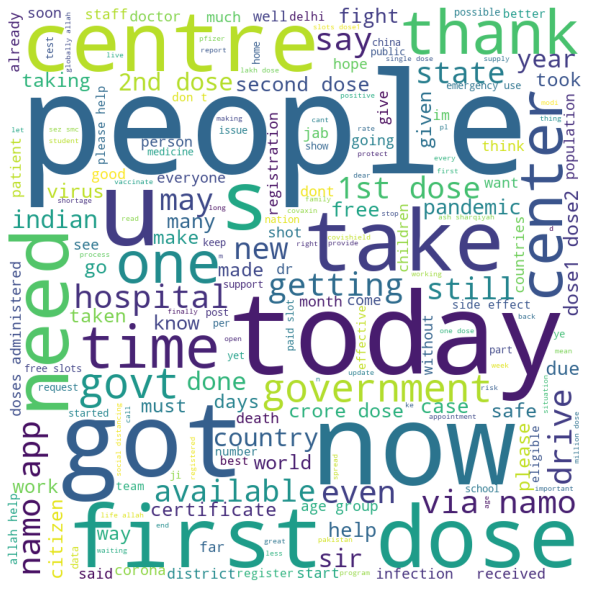

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()